The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

You will unzip the zip file manually in preparation for this assignment.

The link to the zip file is (you have already used it in your assignment 5):

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data"

The folder contains the yearly data files from 1996 to 2019 school years.

if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.


In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import os
import pandas as pd
import zipfile

In [ ]:
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder
print(os.getcwd()) 

/content


In [ ]:
# Extracts files from zip file
with zipfile.ZipFile('CollegeScorecard_Raw_Data.zip', 'r') as zip_ref:
    zip_ref.extractall('College_Scorecard')

In [ ]:
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder
college_list = os.listdir('College_Scorecard/CollegeScorecard_Raw_Data')
print(college_list)

['MERGED2018_19_PP.csv', 'MERGED1996_97_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2003_04_PP.csv', 'FieldOfStudyData1415_1516_PP.csv', 'MERGED2017_18_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED2006_07_PP.csv', 'data.yaml', 'FieldOfStudyData1516_1617_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED1999_00_PP.csv', 'Crosswalks.zip', 'MERGED2001_02_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED1997_98_PP.csv', '.DS_Store', 'MERGED2000_01_PP.csv', 'MERGED2002_03_PP.csv']


In [ ]:
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.
data_list = []
for x in range(len(college_list)):
  if college_list[x].find('MERGED') == False: 
    data_list.append(college_list[x])
  else:
    pass
print(data_list)

['MERGED2018_19_PP.csv', 'MERGED1996_97_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2017_18_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED2006_07_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED2000_01_PP.csv', 'MERGED2002_03_PP.csv']


In [ ]:
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
data_list = sorted(data_list)
list_of_dfs = dict()
usecols = ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"]
for fname in data_list:
    list_of_dfs[fname] = pd.read_csv("College_Scorecard/CollegeScorecard_Raw_Data/"+fname, usecols=usecols)

print(list_of_dfs.keys())

dict_keys(['MERGED1996_97_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2000_01_PP.csv', 'MERGED2001_02_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2005_06_PP.csv', 'MERGED2006_07_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2016_17_PP.csv', 'MERGED2017_18_PP.csv', 'MERGED2018_19_PP.csv'])


In [ ]:
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 

for x in data_list:
  year = int(x[6:10])
  list_of_dfs[x]["YEAR"] = year
  print(list_of_dfs[x]["YEAR"])

0       1996
1       1996
2       1996
3       1996
4       1996
        ... 
7002    1996
7003    1996
7004    1996
7005    1996
7006    1996
Name: YEAR, Length: 7007, dtype: int64
0       1997
1       1997
2       1997
3       1997
4       1997
        ... 
6929    1997
6930    1997
6931    1997
6932    1997
6933    1997
Name: YEAR, Length: 6934, dtype: int64
0       1998
1       1998
2       1998
3       1998
4       1998
        ... 
6697    1998
6698    1998
6699    1998
6700    1998
6701    1998
Name: YEAR, Length: 6702, dtype: int64
0       1999
1       1999
2       1999
3       1999
4       1999
        ... 
6604    1999
6605    1999
6606    1999
6607    1999
6608    1999
Name: YEAR, Length: 6609, dtype: int64
0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
6649    2000
6650    2000
6651    2000
6652    2000
6653    2000
Name: YEAR, Length: 6654, dtype: int64
0       2001
1       2001
2       2001
3       2001
4       2001
        ... 
6720    2001

In [ ]:
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
df = pd.DataFrame() 

for x in data_list:
  df = pd.concat([df, list_of_dfs[x]])

In [ ]:
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

print(df.head())
print(df.tail())
print("Number of rows, columns:" , df.shape)
print(df["YEAR"].describe())
print(df["UNITID"].describe())
print(df["INSTNM"].describe())
print(df["STABBR"].describe())
print(df["REGION"].describe())
print(df["ADM_RATE"].describe())
print(df["TUITIONFEE_IN"].describe())

   UNITID                                  INSTNM  ... TUITIONFEE_IN  YEAR
0  100636      Community College of the Air Force  ...           NaN  1996
1  100654                Alabama A & M University  ...           NaN  1996
2  100663     University of Alabama at Birmingham  ...           NaN  1996
3  100672  ALABAMA AVIATION AND TECHNICAL COLLEGE  ...           NaN  1996
4  100690                      Amridge University  ...           NaN  1996

[5 rows x 7 columns]
        UNITID                                    INSTNM  ... TUITIONFEE_IN  YEAR
6801  48511112         Georgia Military College - Dublin  ...        6120.0  2018
6802  48511113        Georgia Military College - Eastman  ...        6120.0  2018
6803  48616901  American College of Barbering - Florence  ...           NaN  2018
6804  49005401      HCI College - Fort Lauderdale Campus  ...       21420.0  2018
6805  49146401          ABC Adult School - Cabrillo Lane  ...           NaN  2018

[5 rows x 7 columns]
Number of rows

In [ ]:
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

valUMBC = df[df["INSTNM"].str.contains("University of Maryland-Baltimore County")]
print(valUMBC)

      UNITID                                   INSTNM  ... TUITIONFEE_IN  YEAR
2151  163268  University of Maryland-Baltimore County  ...           NaN  1996
2049  163268  University of Maryland-Baltimore County  ...           NaN  1997
1982  163268  University of Maryland-Baltimore County  ...           NaN  1998
1955  163268  University of Maryland-Baltimore County  ...           NaN  1999
1926  163268  University of Maryland-Baltimore County  ...        5490.0  2000
1915  163268  University of Maryland-Baltimore County  ...        5910.0  2001
1893  163268  University of Maryland-Baltimore County  ...        6362.0  2002
1873  163268  University of Maryland-Baltimore County  ...        7388.0  2003
1830  163268  University of Maryland-Baltimore County  ...        8020.0  2004
1819  163268  University of Maryland-Baltimore County  ...        8520.0  2005
1799  163268  University of Maryland-Baltimore County  ...        8622.0  2006
1779  163268  University of Maryland-Baltimore Count

In [ ]:
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

print(valUMBC.head())
print(valUMBC.tail())
print("Number of rows, columns:" , valUMBC.shape)
print(valUMBC["YEAR"].describe())
print(valUMBC["UNITID"].describe())
print(valUMBC["INSTNM"].describe())
print(valUMBC["STABBR"].describe())
print(valUMBC["REGION"].describe())
print(valUMBC["ADM_RATE"].describe())
print(valUMBC["TUITIONFEE_IN"].describe())

      UNITID                                   INSTNM  ... TUITIONFEE_IN  YEAR
2151  163268  University of Maryland-Baltimore County  ...           NaN  1996
2049  163268  University of Maryland-Baltimore County  ...           NaN  1997
1982  163268  University of Maryland-Baltimore County  ...           NaN  1998
1955  163268  University of Maryland-Baltimore County  ...           NaN  1999
1926  163268  University of Maryland-Baltimore County  ...        5490.0  2000

[5 rows x 7 columns]
      UNITID                                   INSTNM  ... TUITIONFEE_IN  YEAR
1610  163268  University of Maryland-Baltimore County  ...       10384.0  2014
1555  163268  University of Maryland-Baltimore County  ...       11006.0  2015
1510  163268  University of Maryland-Baltimore County  ...       11264.0  2016
1478  163268  University of Maryland-Baltimore County  ...       11518.0  2017
1415  163268  University of Maryland-Baltimore County  ...       11778.0  2018

[5 rows x 7 columns]
Number o

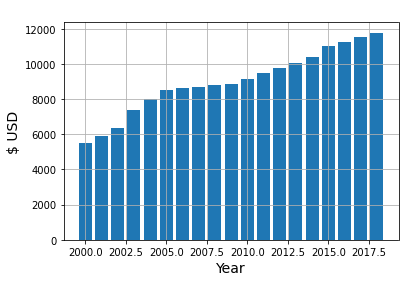

In [ ]:
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

fig, ax = plt.subplots()

ax.bar(valUMBC["YEAR"],valUMBC["TUITIONFEE_IN"])
ax.set_title('UMBC In-State Tuition', color = 'white')
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('$ USD',fontsize=14)
ax.grid(True)

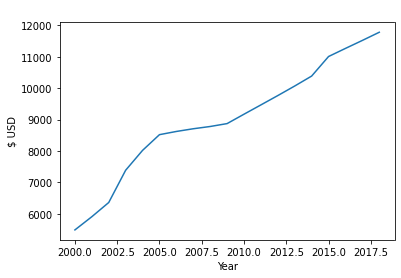

In [ ]:
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

plt.plot(valUMBC["YEAR"],valUMBC["TUITIONFEE_IN"])
plt.title('UMBC In-State Tuition',color='white')
plt.xlabel('Year')
plt.ylabel('$ USD')
plt.show()

In [ ]:
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

TuitionList = [valUMBC["TUITIONFEE_IN"]]
print(TuitionList)

[2151        NaN
2049        NaN
1982        NaN
1955        NaN
1926     5490.0
1915     5910.0
1893     6362.0
1873     7388.0
1830     8020.0
1819     8520.0
1799     8622.0
1779     8708.0
1767     8780.0
1745     8872.0
1710     9171.0
1694     9467.0
1660     9764.0
1629    10068.0
1610    10384.0
1555    11006.0
1510    11264.0
1478    11518.0
1415    11778.0
Name: TUITIONFEE_IN, dtype: float64]


In [ ]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one
PercentChange = []
for x in range(0,22):
  cal = (((TuitionList[0].iloc[x+1]-TuitionList[0].iloc[x]) / TuitionList[0].iloc[x]) * 100)
  PercentChange.append(cal)
  
print(PercentChange)

[nan, nan, nan, nan, 7.650273224043716, 7.648054145516074, 16.12700408676517, 8.554412560909583, 6.234413965087282, 1.1971830985915493, 0.9974483878450475, 0.8268259072117593, 1.0478359908883828, 3.370153291253381, 3.227565151019518, 3.1372134783986483, 3.11347808275297, 3.1386571315057608, 5.989984591679507, 2.344175904052335, 2.254971590909091, 2.2573363431151243]


In [ ]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

for x in range(0,22):
  PercentChange[x] = round(PercentChange[x],2)
print(PercentChange)

[nan, nan, nan, nan, 7.65, 7.65, 16.13, 8.55, 6.23, 1.2, 1.0, 0.83, 1.05, 3.37, 3.23, 3.14, 3.11, 3.14, 5.99, 2.34, 2.25, 2.26]


In [203]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.
# PercentChange = [0] + PercentChange
#PercentChange = PercentChange[1:]
#print(PercentChange)
valUMBC["PCT_CHANGE"] = PercentChange
print(valUMBC["PCT_CHANGE"])

2151     0.00
2049      NaN
1982      NaN
1955      NaN
1926      NaN
1915     7.65
1893     7.65
1873    16.13
1830     8.55
1819     6.23
1799     1.20
1779     1.00
1767     0.83
1745     1.05
1710     3.37
1694     3.23
1660     3.14
1629     3.11
1610     3.14
1555     5.99
1510     2.34
1478     2.25
1415     2.26
Name: PCT_CHANGE, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


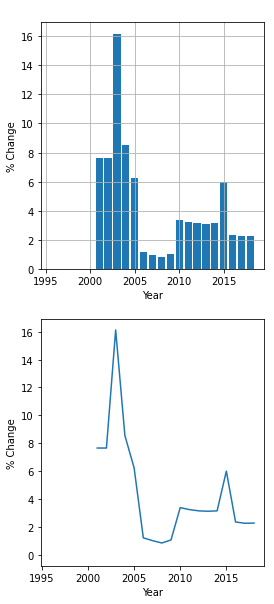

In [204]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(4,10)

ax1.bar(valUMBC["YEAR"],valUMBC["PCT_CHANGE"])
ax1.set_title('UMBC In-State Tuition Percent Change', color = 'white')
ax1.set_xlabel('Year')
ax1.set_ylabel('% Change')
ax1.grid(True)

ax2.plot(valUMBC["YEAR"],valUMBC["PCT_CHANGE"])
plt.title('UMBC In-State Tuition Percent Change',color='white')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.show()

In [ ]:
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

valJHU = df[df["INSTNM"].str.contains("Johns Hopkins University")]
print(valJHU)

      UNITID                    INSTNM STABBR  ...  ADM_RATE  TUITIONFEE_IN  YEAR
2139  162928  Johns Hopkins University     MD  ...       NaN            NaN  1996
2039  162928  Johns Hopkins University     MD  ...       NaN            NaN  1997
1973  162928  Johns Hopkins University     MD  ...       NaN            NaN  1998
1946  162928  Johns Hopkins University     MD  ...       NaN            NaN  1999
1917  162928  Johns Hopkins University     MD  ...       NaN        24930.0  2000
1906  162928  Johns Hopkins University     MD  ...    0.3431        26210.0  2001
1884  162928  Johns Hopkins University     MD  ...    0.3506        27390.0  2002
1865  162928  Johns Hopkins University     MD  ...    0.3060        28730.0  2003
1823  162928  Johns Hopkins University     MD  ...    0.3071        30140.0  2004
1812  162928  Johns Hopkins University     MD  ...    0.3509        31620.0  2005
1792  162928  Johns Hopkins University     MD  ...    0.2792        33900.0  2006
1772  162928  Jo

In [195]:
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

def PercentFunction(mylist):
  PctChg = []
  for x in range(0,22): #this part calculates percent change
    calc = (((mylist[x+1]-mylist[x]) / mylist[x]) * 100)
    PctChg.append(calc)


  for x in range(0,22): #this part rounds the decimal
   PctChg[x] = round(PctChg[x],2)

  return PctChg

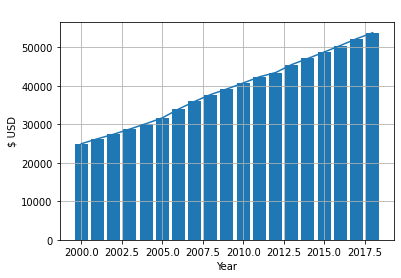

In [ ]:
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

fig, ax = plt.subplots()

ax.bar(valJHU["YEAR"],valJHU["TUITIONFEE_IN"])
ax.set_title('JHU In-State Tuition', color = 'white')
ax.set_xlabel('Year')
ax.set_ylabel('$ USD')
ax.grid(True)

plt.plot(valJHU["YEAR"],valJHU["TUITIONFEE_IN"])
plt.title('JHU In-State Tuition',color='white')
plt.xlabel('Year')
plt.ylabel('$ USD')
plt.show()

In [205]:
# Let's calculate the JHU tuition percentge growth using the function defined earlier

JHUtuition = valJHU["TUITIONFEE_IN"]
tuitionList = JHUtuition.values.tolist()
testval = PercentFunction(tuitionList)
print(testval)

[nan, nan, nan, nan, 5.13, 4.5, 4.89, 4.91, 4.91, 7.21, 5.9, 5.01, 3.85, 3.91, 3.93, 2.63, 4.79, 3.5, 3.51, 3.49, 3.49, 3.01]


In [207]:
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

#testval = [0] + testval
valJHU["PCT_CHANGE"] = testval
print(valJHU["PCT_CHANGE"])

2139    0.00
2039     NaN
1973     NaN
1946     NaN
1917     NaN
1906    5.13
1884    4.50
1865    4.89
1823    4.91
1812    4.91
1792    7.21
1772    5.90
1760    5.01
1738    3.85
1703    3.91
1687    3.93
1653    2.63
1622    4.79
1603    3.50
1548    3.51
1503    3.49
1473    3.49
1410    3.01
Name: PCT_CHANGE, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


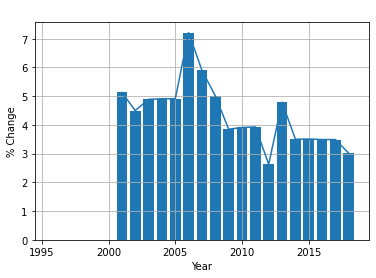

In [208]:
# Make a bar plot of the JHU percentage changes tuitions over time

fig, ax = plt.subplots()

ax.bar(valJHU["YEAR"],valJHU["PCT_CHANGE"])
ax.set_title('JHU In-State Tuition Percent Change', color = 'white')
ax.set_xlabel('Year')
ax.set_ylabel('% Change')
ax.grid(True)

plt.plot(valJHU["YEAR"],valJHU["PCT_CHANGE"])
plt.title('JHU In-State Tuition Percent Change',color='white')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.show()

In [244]:
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

umbc2 = valUMBC[["YEAR", "PCT_CHANGE"]]
umbc2 = umbc2.rename(columns={"PCT_CHANGE":"UMBC_PCT"})
umbc2 = umbc2.set_index("YEAR")
# print(umbc2)

In [245]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

jhu2 = valJHU[["YEAR", "PCT_CHANGE"]]
jhu2 = jhu2.rename(columns={"PCT_CHANGE":"JHU_PCT"})
jhu2 = jhu2.set_index("YEAR")
# print(jhu2)

In [263]:
# Now, merger the two data frames
# and display the new dataframe

# jhu2.set_index("YEAR")
# umbc2.set_index("YEAR")
merged = pd.concat([umbc2, jhu2], axis=1)
merged = merged.reset_index()
# print(merged)

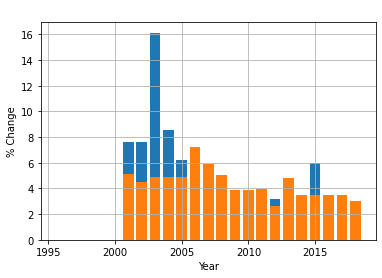

In [261]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

fig, ax = plt.subplots()
# print(merged)
ax.bar(merged["YEAR"], merged['UMBC_PCT'])
ax.bar(merged["YEAR"], merged['JHU_PCT'])
ax.set_title('JHU & UMBC In-State Tuition Percent Change', color = 'white')
ax.set_xlabel('Year')
ax.set_ylabel('% Change')
ax.grid(True)
plt.show()

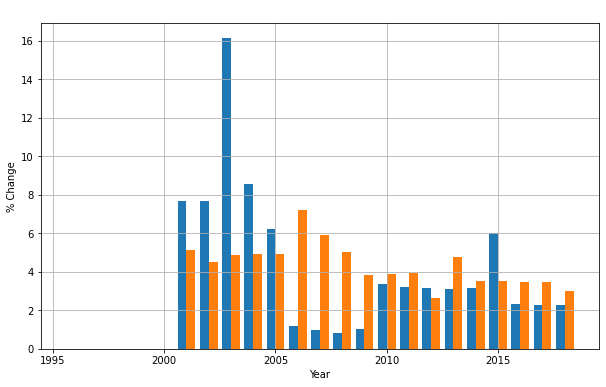

In [262]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
# print(merged)
w = 0.2
ax.bar(merged["YEAR"]-w, merged['UMBC_PCT'], width=0.4)
ax.bar(merged["YEAR"]+w, merged['JHU_PCT'], width=0.4)
ax.set_title('JHU & UMBC In-State Tuition Percent Change', color = 'white')
ax.set_xlabel('Year')
ax.set_ylabel('% Change')
ax.grid(True)
plt.show()

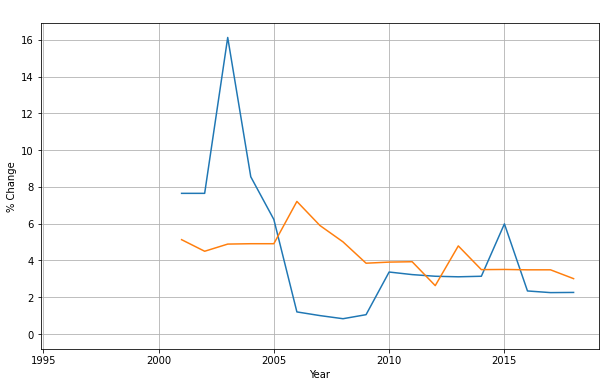

In [266]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

fig, ax = plt.subplots()
fig.set_size_inches(10,6)

plt.plot(merged["YEAR"], merged["UMBC_PCT"])
plt.plot(merged["YEAR"], merged["JHU_PCT"])
plt.title('JHU & UMBC In-State Tuition Percent Change',color='white')
ax.grid(True)
plt.xlabel('Year')
plt.ylabel('% Change')
plt.show()

Based on my observation of the plots, JHU is much more expensive than UMBC.  However UMBC has had more radical percent changes in tuition than JHU.
In conclusion, both schools have their merits.